In [1]:
import xarray as xr
import Calculation.trend_func as trends

data = xr.open_dataset('/home/nniebaum/data_nils/europe_full_daymax_1900-01-01_2010-12-31.nc')
cdo_ydrunpctl = xr.open_dataset('/data/user/nniebaum/europe_full_daymax_ydrunpctl9030_1900-01-01_2010-12-31.nc')

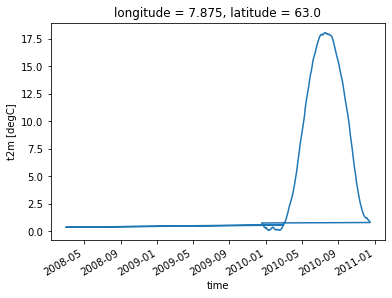

In [2]:
cdo_ydrunpctl.t2m.isel(latitude = 10, longitude = 20).plot()

In [3]:
# calculate mask based on quantile for each gridpoint along dimsension time
quantile = [0.9,0.95,0.98]
data["t2m_mask_quantiles"] = data["t2m"] >= data["t2m"].quantile(quantile, dim = "time")

In [4]:
def calc_mask_ydrunpctl(data, cdo_data, variable = "t2m"):
    
    # get vector with corresponding months and days for the data
    months_data = data.time.dt.month
    days_data = data.time.dt.day
    
    # get vector with corresponding months and days for the cdo processed data
    time_of = cdo_data.time
    months_of = cdo_data.time.dt.month
    days_of = cdo_data.time.dt.day

    # create tuples with month and day for each timestep of the processed data
    tuples = []
    for of_step in time_of:
        tuples.append((of_step.dt.month.values, of_step.dt.day.values))
    
    # result will save the mask ->> create an fully False mask 
    result = (data[variable] * 0).astype(bool)
    for step in tuples:
#         for each tuple get the mask for data and cdo_data
        mask_data        = ((step[0] == months_data) & (step[1] == days_data))
        mask_cdo_data    = ((step[0] == months_of)   & (step[1] == days_of))
        # mask is the boolean array where the
#         print('calc mask')
        mask = data[variable].sel(time = mask_data).load() >= cdo_data[variable].sel(time = mask_cdo_data).values
        if mask.values.sum() > 0:
            result[mask_data] = result[mask_data]  + mask.values
        else :
            pass
    
    return result

In [5]:
# calculate mask based on the 30 day running mean percentile data calculated by cdo ydrunpctl
data['t2m_mask_ydrunpctl'] = data.t2m_mask_quantiles * 0

idx = 0
for quantile in data.t2m_mask_quantiles.coords['quantile'].values :
    cdo_ydrunpctl = xr.open_dataset('/data/user/nniebaum/europe_full_daymax_ydrunpctl{:.0f}30_1900-01-01_2010-12-31.nc'.format(quantile*100))
    data.t2m_mask_ydrunpctl[:,:,:,idx] = calc_mask_ydrunpctl(data, cdo_ydrunpctl, variable = "t2m")
    idx += 1

In [ ]:
# calculate mask based on the 30 day running mean percentile data calculated by cdo ydrunpctl
data['t2m_mask_stddev'] = data.t2m_mask_quantiles * 0
mean = xr.open_dataset('/data/user/nniebaum/europe_full_daymean_1900-01-01_2010-12-31.nc')
stddev = xr.open_dataset('/data/user/nniebaum/europe_full_daystd_1900-01-01_2010-12-31.nc')
# multiplication_stddev = [1.65,2,2.32]   
# idx = 0
# for quantile in data.t2m_mask_quantiles.coords['quantile'].values :
    
#     mean.t2m + multiplication_stddev[idx] * stddev.t2m

mean.t2m + 2

In [ ]:
data.t2m_mask_ydrunpctl.sum({'time','latitude', 'longitude'}).plot()
data.t2m_mask_quantiles.sum({'time','latitude', 'longitude'}).plot()
data.t2m_mask_stddev.sum({'time','latitude', 'longitude'}).plot()


In [61]:
minf = xr.open_dataset('/home/nniebaum/data_nils/minfile')
infile = xr.open_dataset('/home/nniebaum/data_nils/europe_all_1900-01-01_1930-12-31.nc')


In [7]:
data.to_netcdf('/data/user/nniebaum/europe_full_daymax_masks_1900-01-01_2010-12-31.nc')

In [36]:
infile = data
months_data = infile.time.dt.month
days_data = infile.time.dt.day

of = cdo_ydrunpctl

time_of = of.time
months_of = of.time.dt.month
days_of = of.time.dt.day

tuples = []
for of_step in time_of:
    tuples.append((of_step.dt.month.values, of_step.dt.day.values))

infile["mask"] = (infile.t2m * 0).astype(bool)
for step in tuples:
    mask_data = ((step[0] == months_data) & (step[1] == days_data))
    mask_of = ((step[0] == months_of) & (step[1] == days_of))

    mask = infile.t2m.sel(time = mask_data) >= of.t2m.sel(time = mask_of).values
#     infile["mask"][mask_data] = infile["mask"][mask_data]  + mask.values
    print(mask.sum().values)

21579
21482
22661
22776
23768
25088
24592
23548
23668
24580
24698
25109
25588
25033
24167
22804
22725
24121
23908
22089
22744
23272
23962
22720
22451
20976
21066
21646
21387
20540
19709
21490
21719
20764
21444
23125
24595
25471
26701
24220
21813
21689
23584
24014
22745
23633
22455
22569
22348
22016
20420
21332
21347
22340
22210
20502
20536
21102
21201
6720
22992
23157
21841
20928
21584
22206
22133
22491
22452
22730
22918
21540
20968
18761
17800
17236
18243
18988
18601
18864
19498
19666
21408
21125
20725
20117
19639
19400
19290
19568
19894
20317
21017
20838
19997
18919
18189
17866
18384
19822
21339
21395
20309
19340
20653
21452
20424
19288
18385
17995
17779
18985
19789
18695
19823
19281
18593
17533
16309
15936
16870
18092
18491
18929
20037
20496
20019
20003
20355
20068
20434
20353
21140
20366
19395
19267
19532
20644
21174
19742
18907
18994
18150
16619
16848
17135
17205
17517
17319
17939
18195
17678
17641
18978
19037
18937
18766
20057
21103
20481
20343
20227
20124
19871
19530
18651
18097

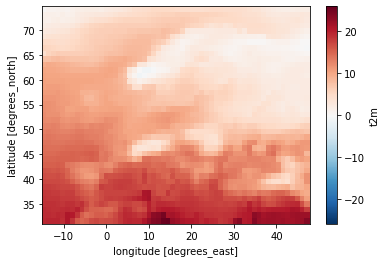

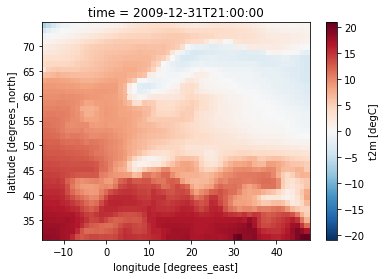

In [35]:
import matplotlib.pyplot as plt
infile.t2m.sel(time = mask_data).max("time").plot()
plt.figure()
of.t2m.sel(time = mask_of).plot()

In [166]:
infile.time.values

array(['1900-01-01T00:00:00.000000000', '1900-01-01T06:00:00.000000000',
       '1900-01-01T12:00:00.000000000', ...,
       '1930-12-31T06:00:00.000000000', '1930-12-31T12:00:00.000000000',
       '1930-12-31T18:00:00.000000000'], dtype='datetime64[ns]')

In [171]:
ip = '/home/nniebaum/data_nils/europe_all_1980-01-01_2010-12-31.nc'


SyntaxError: positional argument follows keyword argument (<ipython-input-171-cc6d71c40fcf>, line 3)

In [162]:
std = xr.open_dataset('/home/nniebaum/data_nils/firststd.nc')

mean = xr.open_dataset('/home/nniebaum/data_nils/firstmean.nc')

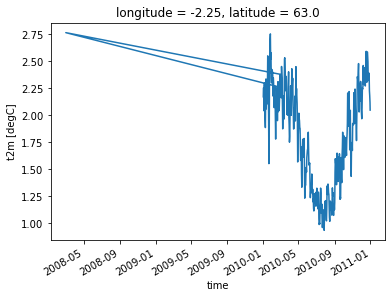

In [129]:
std.t2m.isel(longitude = 10, latitude = 10 ).plot()

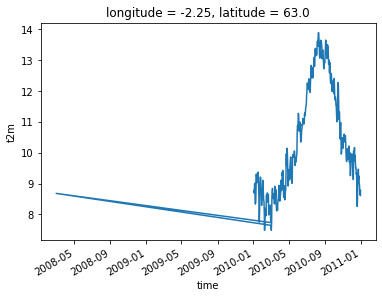

In [131]:
(mean + 2*std).t2m.isel(longitude = 10, latitude = 10 ).plot()